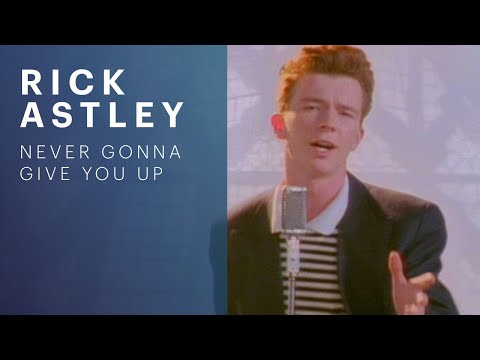

In [1]:
from IPython.display import YouTubeVideo 
from IPython.display import Image
YouTubeVideo('dQw4w9WgXcQ', play=True)

In [5]:
!conda env list
# make sure to be in the proper environment if you are using jupyter notebook

# conda environments:
#
base                     /root/anaconda3
DL                    *  /root/anaconda3/envs/DL
RL                       /root/anaconda3/envs/RL
control_project          /root/anaconda3/envs/control_project



In [6]:
import torch
print(torch.__version__)
print(torch.version.cuda)

1.10.2
None


In [ ]:
# # For colab
# # pytorch geometric installation # match the versions of torch from above when installing
# !pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
# !pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
# !pip install torch-geometric

In [10]:
# library for cheminformatics
!pip install rdkit-pypi

     |████████████████████████████████| 29.3 MB 99 kB/s  eta 0:00:01


In [11]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

# Regression task on graph
The Delaney (ESOL) dataset a regression dataset containing structures and water solubility data for 1128 compounds. The dataset is widely used to validate machine learning models on estimating solubility directly from molecular structures (as encoded in SMILES strings).

In [ ]:
from torch_geometric.datasets import MoleculeNet

data = MoleculeNet(root=".", name="ESOL")

In [13]:
print("dataset type:", type(data))
print("dataset features:", data.num_features)
print("total num of molecules",len(data))

dataset type: <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
dataset features: 9
total num of molecules 1128


In [15]:
mol_list= []
for i in range(18):
  # print(f'{i}:{data[i]}')
  print(f'data{i} has:{data[i].num_nodes} nodes')
  print(f'data{i} has:{data[i].num_edges} edges')
  print(f"target for data{i}:{data[i].y}")
  mol = Chem.MolFromSmiles(data[i]["smiles"])
  mol_list.append(mol)
img = Draw.MolsToGridImage(mol_list)

data0 has:32 nodes
data0 has:68 edges
target for data0:tensor([[-0.7700]])
data1 has:15 nodes
data1 has:32 edges
target for data1:tensor([[-3.3000]])
data2 has:11 nodes
data2 has:20 edges
target for data2:tensor([[-2.0600]])
data3 has:22 nodes
data3 has:52 edges
target for data3:tensor([[-7.8700]])
data4 has:5 nodes
data4 has:10 edges
target for data4:tensor([[-1.3300]])
data5 has:9 nodes
data5 has:20 edges
target for data5:tensor([[-1.5000]])
data6 has:17 nodes
data6 has:36 edges
target for data6:tensor([[-7.3200]])
data7 has:20 nodes
data7 has:46 edges
target for data7:tensor([[-5.0300]])
data8 has:19 nodes
data8 has:46 edges
target for data8:tensor([[-6.2900]])
data9 has:29 nodes
data9 has:66 edges
target for data9:tensor([[-4.4200]])
data10 has:6 nodes
data10 has:12 edges
target for data10:tensor([[1.0700]])
data11 has:11 nodes
data11 has:24 edges
target for data11:tensor([[-4.1400]])
data12 has:5 nodes
data12 has:8 edges
target for data12:tensor([[-2.6800]])
data13 has:16 nodes
da

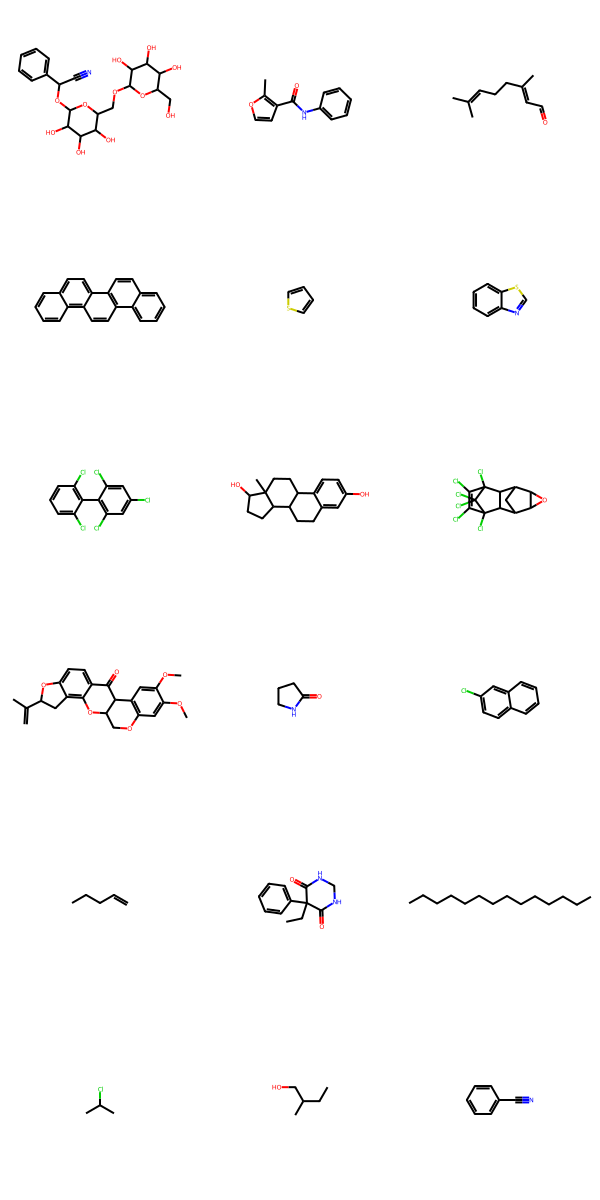

In [16]:
img

8:Data(x=[19, 9], edge_index=[2, 46], edge_attr=[46, 3], y=[1, 1], smiles='ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl')
data8 has:19 nodes
data8 has:46 edges
#####################
torch.Size([19, 9])
tensor([[17,  0,  1,  5,  0,  0,  4,  0,  0],
        [ 6,  0,  3,  5,  0,  0,  3,  0,  1],
        [ 6,  0,  3,  5,  0,  0,  3,  0,  1],
        [17,  0,  1,  5,  0,  0,  4,  0,  0],
        [ 6,  0,  4,  5,  0,  0,  4,  0,  1],
        [17,  0,  1,  5,  0,  0,  4,  0,  0],
        [ 6,  0,  4,  5,  1,  0,  4,  0,  1],
        [ 6,  0,  4,  5,  1,  0,  4,  0,  1],
        [ 6,  0,  4,  5,  2,  0,  4,  0,  1],
        [ 6,  0,  4,  5,  1,  0,  4,  0,  1],
        [ 6,  0,  4,  5,  1,  0,  4,  0,  1],
        [ 8,  0,  2,  5,  0,  0,  4,  0,  1],
        [ 6,  0,  4,  5,  1,  0,  4,  0,  1],
        [ 6,  0,  4,  5,  1,  0,  4,  0,  1],
        [ 6,  0,  4,  5,  0,  0,  4,  0,  1],
        [17,  0,  1,  5,  0,  0,  4,  0,  0],
        [ 6,  0,  4,  5,  0,  0,  4,  0,  1],
        [17,  

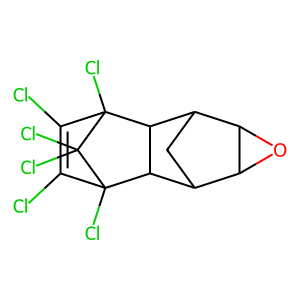

In [18]:
i = 8

print(f'{i}:{data[i]}')
print(f'data{i} has:{data[i].num_nodes} nodes')
print(f'data{i} has:{data[i].num_edges} edges')
mol = Chem.MolFromSmiles(data[i]["smiles"])
Draw.MolToFile(mol,'test.png')
print("#####################")
print(data[i].x.shape)
print(data[i].x)
print("#####################")
print("edge_index:")
print(data[i].edge_index)
print("#####################")
# print("edge_index_shape",data[i].edge_index.shape) # (2, num_edges)
print("target:",data[i].y)
Image('test.png')

In [19]:
# Edge_list when transposed
data[i].edge_index.t()

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 1, 14],
        [ 2,  1],
        [ 2,  3],
        [ 2,  4],
        [ 3,  2],
        [ 4,  2],
        [ 4,  5],
        [ 4,  6],
        [ 4, 16],
        [ 5,  4],
        [ 6,  4],
        [ 6,  7],
        [ 6, 13],
        [ 7,  6],
        [ 7,  8],
        [ 7, 12],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 13],
        [10,  9],
        [10, 11],
        [10, 12],
        [11, 10],
        [11, 12],
        [12,  7],
        [12, 10],
        [12, 11],
        [13,  6],
        [13,  9],
        [13, 14],
        [14,  1],
        [14, 13],
        [14, 15],
        [14, 16],
        [15, 14],
        [16,  4],
        [16, 14],
        [16, 17],
        [16, 18],
        [17, 16],
        [18, 16]])

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
embedding_size = 100

class GCN(torch.nn.Module):
    def __init__(self):
        # Init parent
        super(GCN, self).__init__()

        # GCN layers
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)

        # Output layer
        self.out = nn.Linear(embedding_size*2, 1)

    def forward(self, x, edge_index, batch_index):
        # First Conv layer
#         print(x.shape)
#         print(edge_index.shape)
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)

        # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)
          
        # Global Pooling (stack different aggregations)
        hidden = torch.cat([gmp(hidden, batch_index), 
                            gap(hidden, batch_index)], dim=1)

        # Apply a final (linear) classifier.
        out = self.out(hidden)

        return out, hidden

model = GCN()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GCN(
  (initial_conv): GCNConv(9, 100)
  (conv1): GCNConv(100, 100)
  (conv2): GCNConv(100, 100)
  (conv3): GCNConv(100, 100)
  (out): Linear(in_features=200, out_features=1, bias=True)
)
Number of parameters:  31501


In [23]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

# Root mean squared error
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)  

# Use GPU for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Wrap data in a data loader
data_size = len(data)
batch_size = 64
loader = DataLoader(data[:int(data_size * 0.8)], 
                    batch_size=batch_size, shuffle=True)
test_loader = DataLoader(data[int(data_size * 0.8):], 
                         batch_size=batch_size, shuffle=True)

def train(data):
    # Enumerate over the data
    for batch in loader:
      # Use GPU
      batch.to(device)  
      # Reset gradients
      optimizer.zero_grad() 
      # Passing the node features and the connection info
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch) 
      # Calculating the loss and gradients
      loss = torch.sqrt(criterion(pred, batch.y))       
      loss.backward()  
      # Update using the gradients
      optimizer.step()   
    return loss, embedding

print("Starting training...")
losses = []
for epoch in range(1000):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 50 == 0:
      print(f"Epoch {epoch} | Train Loss {loss}")

Starting training...
Epoch 0 | Train Loss 2.7991127967834473
Epoch 50 | Train Loss 0.8798342347145081
Epoch 100 | Train Loss 1.249974250793457
Epoch 150 | Train Loss 1.1459987163543701
Epoch 200 | Train Loss 0.9810492992401123
Epoch 250 | Train Loss 1.3870238065719604
Epoch 300 | Train Loss 0.6125874519348145
Epoch 350 | Train Loss 0.40399807691574097
Epoch 400 | Train Loss 0.6502644419670105
Epoch 450 | Train Loss 0.7918299436569214
Epoch 500 | Train Loss 0.6766245365142822
Epoch 550 | Train Loss 0.4495740532875061
Epoch 600 | Train Loss 0.9129741787910461
Epoch 650 | Train Loss 0.4832547605037689
Epoch 700 | Train Loss 0.5934233069419861
Epoch 750 | Train Loss 1.2204376459121704
Epoch 800 | Train Loss 0.6877226829528809
Epoch 850 | Train Loss 0.42419278621673584
Epoch 900 | Train Loss 0.7786635160446167
Epoch 950 | Train Loss 0.6114874482154846


<AxesSubplot: >

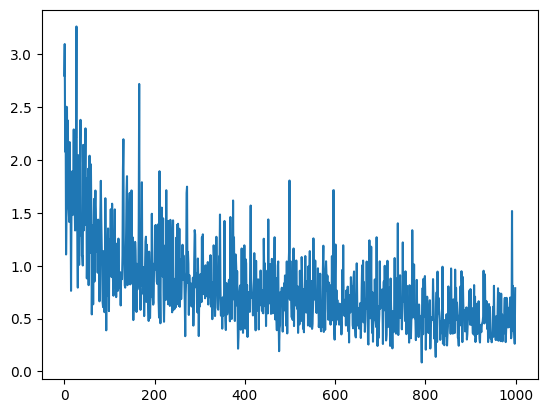

In [27]:
# Visualize learning (training loss)
import seaborn as sns
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses] 
loss_indices = [i for i,l in enumerate(losses_float)] 
plt = sns.lineplot(x=loss_indices, y=losses_float)
plt

In [28]:
import pandas as pd 

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) 
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

,y_real,y_pred
0,-1.470,-1.263416
1,-8.400,-7.271846
2,-4.522,-3.665018
3,-3.880,-3.959666
4,-2.461,-2.407580
...,...,...
59,-4.114,-4.819705
60,-4.100,-3.038945
61,-2.060,-2.217143
62,-3.224,-3.264888


<AxesSubplot: xlabel='y_real', ylabel='y_pred'>

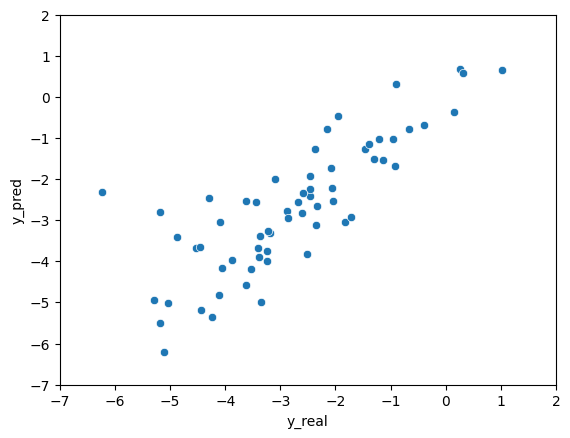

In [29]:
plt = sns.scatterplot(data=df, x="y_real", y="y_pred")
plt.set(xlim=(-7, 2))
plt.set(ylim=(-7, 2))
plt

# Classification Task
The “Toxicology in the 21st Century” (Tox21) initiative created a public database measuring toxicity of compounds, which has been used in the 2014 Tox21 Data Challenge. This dataset contains qualitative toxicity measurements for 8k compounds on 12 different targets, including nuclear receptors and stress response pathways.

cleaning required for this dataset, change all the nan values to 0 and further remove the data that only has zeros as their outputs.

after cleaning the model is similar to above with the exception of the cost function.

In [30]:
from torch_geometric.datasets import MoleculeNet
data = MoleculeNet(root=".", name="TOX21")

Extracting ./tox21/raw/tox21.csv.gz
Processing...
[20:39:54] WARNING: not removing hydrogen atom without neighbors
Done!


In [31]:
print("dataset type:", type(data))
print("dataset features:", data.num_features)
print("dataset classes", data.num_classes)
print("total num of molecules",len(data))

dataset type: <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
dataset features: 9
dataset classes 12
total num of molecules 7831


In [32]:
mol_list= []
for i in range(18):
  print(f'{i}:{data[i]}')
  print(f'data{i} has:{data[i].num_nodes} nodes')
  print(f'data{i} has:{data[i].num_edges} edges')
  print(f"target for data{i}:{data[i].y}")
  print("###############################")
  mol = Chem.MolFromSmiles(data[i]["smiles"])
  mol_list.append(mol)
img = Draw.MolsToGridImage(mol_list)

0:Data(x=[16, 9], edge_index=[2, 34], edge_attr=[34, 3], y=[1, 12], smiles='CCOc1ccc2nc(S(N)(=O)=O)sc2c1')
data0 has:16 nodes
data0 has:34 edges
target for data0:tensor([[0., 0., 1., nan, nan, 0., 0., 1., 0., 0., 0., 0.]])
###############################
1:Data(x=[15, 9], edge_index=[2, 32], edge_attr=[32, 3], y=[1, 12], smiles='CCN1C(=O)NC(c2ccccc2)C1=O')
data1 has:15 nodes
data1 has:32 edges
target for data1:tensor([[0., 0., 0., 0., 0., 0., 0., nan, 0., nan, 0., 0.]])
###############################
2:Data(x=[21, 9], edge_index=[2, 48], edge_attr=[48, 3], y=[1, 12], smiles='CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]3CC[C@@]21C')
data2 has:21 nodes
data2 has:48 edges
target for data2:tensor([[nan, nan, nan, nan, nan, nan, nan, 0., nan, 0., nan, nan]])
###############################
3:Data(x=[20, 9], edge_index=[2, 40], edge_attr=[40, 3], y=[1, 12], smiles='CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C')
data3 has:20 nodes
data3 has:40 edges
target for data3:tensor([[0., 0., 0., 0., 0., 0., 0.,

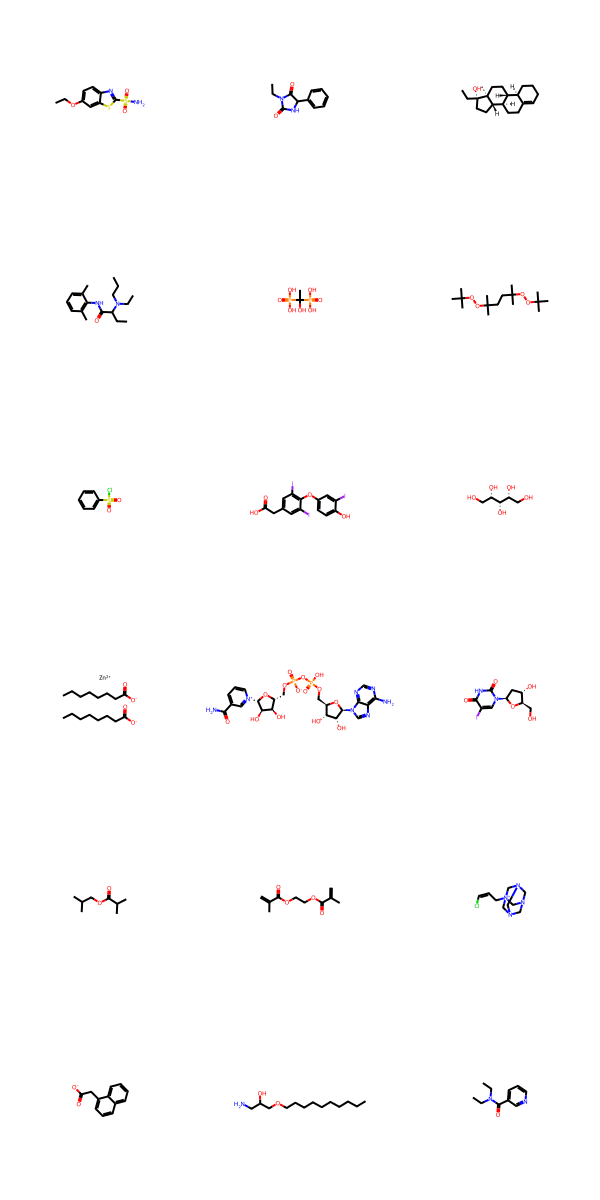

In [33]:
img

10:Data(x=[44, 9], edge_index=[2, 96], edge_attr=[96, 3], y=[1, 12], smiles='NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)([O-])OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)c1')
data10 has:44 nodes
data10 has:96 edges
#####################
torch.Size([44, 9])
tensor([[ 7,  0,  3,  5,  2,  0,  3,  0,  0],
        [ 6,  0,  3,  5,  0,  0,  3,  0,  0],
        [ 8,  0,  1,  5,  0,  0,  3,  0,  0],
        [ 6,  0,  3,  5,  0,  0,  3,  1,  1],
        [ 6,  0,  3,  5,  1,  0,  3,  1,  1],
        [ 6,  0,  3,  5,  1,  0,  3,  1,  1],
        [ 6,  0,  3,  5,  1,  0,  3,  1,  1],
        [ 7,  0,  3,  6,  0,  0,  3,  1,  1],
        [ 6,  2,  4,  5,  1,  0,  4,  0,  1],
        [ 8,  0,  2,  5,  0,  0,  4,  0,  1],
        [ 6,  2,  4,  5,  1,  0,  4,  0,  1],
        [ 6,  0,  4,  5,  2,  0,  4,  0,  0],
        [ 8,  0,  2,  5,  0,  0,  4,  0,  0],
        [15,  0,  4,  5,  0,  0,  4,  0,  0],
        [ 8,  0,  1,  5,  0,  0,  3,  0,  0],
        [ 8,  0,  1,  4,  0

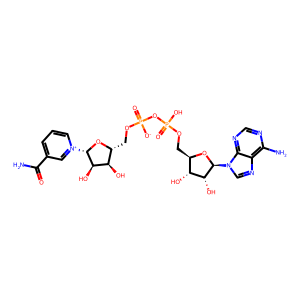

In [35]:
i = 10

print(f'{i}:{data[i]}')
print(f'data{i} has:{data[i].num_nodes} nodes')
print(f'data{i} has:{data[i].num_edges} edges')
mol = Chem.MolFromSmiles(data[i]["smiles"])
Draw.MolToFile(mol,'test.png')
print("#####################")
print(data[i].x.shape)
print(data[i].x)
print("#####################")
print("edge_index:")
print(data[i].edge_index)
print("#####################")
# print("edge_index_shape",data[i].edge_index.shape) # (2, num_edges)
print("target:",data[i].y)
Image('test.png')

In [36]:
# Edge_list when transposed
data[i].edge_index.t()

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 2,  1],
        [ 3,  1],
        [ 3,  4],
        [ 3, 43],
        [ 4,  3],
        [ 4,  5],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 43],
        [ 8,  7],
        [ 8,  9],
        [ 8, 41],
        [ 9,  8],
        [ 9, 10],
        [10,  9],
        [10, 11],
        [10, 39],
        [11, 10],
        [11, 12],
        [12, 11],
        [12, 13],
        [13, 12],
        [13, 14],
        [13, 15],
        [13, 16],
        [14, 13],
        [15, 13],
        [16, 13],
        [16, 17],
        [17, 16],
        [17, 18],
        [17, 19],
        [17, 20],
        [18, 17],
        [19, 17],
        [20, 17],
        [20, 21],
        [21, 20],
        [21, 22],
        [22, 21],
        [22, 23],
        [22, 37],
        [23, 22],
        [23, 24],
        [24, 23],
        [24, 25],
        [24, 35],
        [2